# Week 1 assignment
In this week, we will use the skills we learned in NumPy and Matplotlib to build a describe function for the crop
Recommendation data set, plot the columns from the data set to better understand the data, make subset of the data
with a condition and plot it, write and use the sigmoid function to make simple predictions on the type of crop.


1-Write the describe function
- The function should return a dictionary the contains (shape, size, dtype, min, max, mean, median, standard deviation, variance)

2-Plot the columns
- Use histogram plots for the first seven columns and a pie plot for the last column

3-Creat a subset of the data
- Create a new NumPy array that contain values from the last row of the original data set with a condition that the value is either
(0 or 21)


4-Plot a pie plot of the resulting subset


5- Get the X and Y from the data
- From the last column, take the values that are either (0 or 1)


6- Write a function that return the sigmoid of a number


7- Using the given weights and biases and the data you obtained, make prediction

- Hint: Use the sigmoid function you wrote earlier in this function


8- Plot a pie plot of the result



# Reading the data

In [1]:
{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 

In [3]:
with open('dataset.p', 'rb') as f:
    dataset = pickle.load(f)

In [4]:
with open('weight_and_bias.p', 'rb') as f:
    weight_and_bias = pickle.load(f)

In [5]:
dataset

array([[ 90.        ,  42.        ,  43.        , ...,   6.50298529,
        202.9355362 ,   0.        ],
       [ 85.        ,  58.        ,  41.        , ...,   7.03809636,
        226.6555374 ,   0.        ],
       [ 60.        ,  55.        ,  44.        , ...,   7.84020714,
        263.9642476 ,   0.        ],
       ...,
       [118.        ,  33.        ,  30.        , ...,   6.36260785,
        173.3228386 ,  21.        ],
       [117.        ,  32.        ,  34.        , ...,   6.75879255,
        127.1752928 ,  21.        ],
       [104.        ,  18.        ,  30.        , ...,   6.77983261,
        140.9370415 ,  21.        ]])

In [6]:
dataset.shape

(2200, 8)

In [7]:
dataset[True].shape

(1, 2200, 8)

In [8]:
dataset[0,True]

array([[ 90.        ,  42.        ,  43.        ,  20.87974371,
         82.00274423,   6.50298529, 202.9355362 ,   0.        ]])

In [9]:
dataset[True][0]

array([[ 90.        ,  42.        ,  43.        , ...,   6.50298529,
        202.9355362 ,   0.        ],
       [ 85.        ,  58.        ,  41.        , ...,   7.03809636,
        226.6555374 ,   0.        ],
       [ 60.        ,  55.        ,  44.        , ...,   7.84020714,
        263.9642476 ,   0.        ],
       ...,
       [118.        ,  33.        ,  30.        , ...,   6.36260785,
        173.3228386 ,  21.        ],
       [117.        ,  32.        ,  34.        , ...,   6.75879255,
        127.1752928 ,  21.        ],
       [104.        ,  18.        ,  30.        , ...,   6.77983261,
        140.9370415 ,  21.        ]])

# 1- Build Describe Function Using Numpy
 

*   The function takes data and axis as input
*   The function should return a dictionary the contains (shape, size, dtype, min, max, mean, median, standard deviation, variance) of the data applied to axis 





In [10]:
def describe(data,axis=None):
  result = {
      'shape': data.shape,
      'size': data.size,
      'dtype': data.dtype,
  }
  if axis is None:
      result['min'] = np.min(data)
      result['max'] = np.max(data)
      result['mean'] = np.mean(data)
      result['median'] = np.median(data)
      result['standard deviation'] = np.std(data)
      result['variance'] = np.var(data)
      return result

  if axis == 0 or axis == 1:
    result['min'] = np.min(data, axis=axis)
    result['max'] = np.max(data, axis=axis)
    result['mean'] = np.mean(data, axis=axis)
    result['median'] = np.median(data, axis=axis)
    result['standard deviation'] = np.std(data, axis=axis)
    result['variance'] = np.var(data, axis=axis)
    return result
  else:
    return 'Invalid Axis'


In [11]:
describe(dataset,axis=0)

{'shape': (2200, 8),
 'size': 17600,
 'dtype': dtype('float64'),
 'min': array([ 0.        ,  5.        ,  5.        ,  8.82567475, 14.25803981,
         3.50475231, 20.21126747,  0.        ]),
 'max': array([140.        , 145.        , 205.        ,  43.67549305,
         99.98187601,   9.93509073, 298.5601175 ,  21.        ]),
 'mean': array([ 50.55181818,  53.36272727,  48.14909091,  25.61624385,
         71.48177922,   6.46948007, 103.46365542,  10.5       ]),
 'median': array([37.        , 51.        , 32.        , 25.5986932 , 80.47314567,
         6.42504527, 94.86762427, 10.5       ]),
 'standard deviation': array([36.90894258, 32.97838509, 50.63641835,  5.06259762, 22.25875106,
         0.77376177, 54.94589656,  6.34428877]),
 'variance': array([1.36227004e+03, 1.08757388e+03, 2.56404686e+03, 2.56298946e+01,
        4.95451999e+02, 5.98707282e-01, 3.01905155e+03, 4.02500000e+01])}

# 2 - Plot Using Matplotlib
Use histogram plots for the first seven columns and a pie plot for the last column

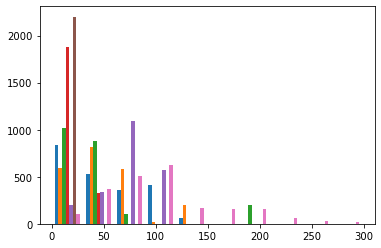

In [12]:
plt.hist(dataset[:,:7])
plt.show()

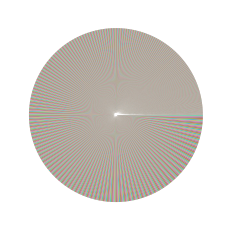

In [13]:
plt.pie(dataset[:,-1])
plt.show()

# 3 - Get Labels 0 and 21 from the Dataset 
Create a new NumPy array that contain values from the last row of the original data set with a condition that the value is either (0 or 21)

In [14]:
(dataset[:,-1] == 0) | (dataset[:,-1] == 21)

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
conditions = (dataset[:, -1] == 0) | (dataset[:, -1] == 21)

for i,v in enumerate(conditions):
    if v:
        print(dataset[i])


In [ ]:
[dataset[i] for i, v in enumerate((dataset[:, -1] == 0) | (dataset[:, -1] == 21))]

In [18]:
out = []
for i,v in enumerate(dataset[:,-1]):
    if (v == 0) or (v == 21):
        out.append(dataset[i])
out

[array([ 90.        ,  42.        ,  43.        ,  20.87974371,
         82.00274423,   6.50298529, 202.9355362 ,   0.        ]),
 array([ 85.        ,  58.        ,  41.        ,  21.77046169,
         80.31964408,   7.03809636, 226.6555374 ,   0.        ]),
 array([ 60.        ,  55.        ,  44.        ,  23.00445915,
         82.3207629 ,   7.84020714, 263.9642476 ,   0.        ]),
 array([ 74.        ,  35.        ,  40.        ,  26.49109635,
         80.15836264,   6.9804009 , 242.8640342 ,   0.        ]),
 array([ 78.        ,  42.        ,  42.        ,  20.13017482,
         81.60487287,   7.62847289, 262.7173405 ,   0.        ]),
 array([ 69.        ,  37.        ,  42.        ,  23.05804872,
         83.37011772,   7.0734535 , 251.0549998 ,   0.        ]),
 array([ 69.        ,  55.        ,  38.        ,  22.70883798,
         82.63941394,   5.70080568, 271.3248604 ,   0.        ]),
 array([ 94.        ,  53.        ,  40.        ,  20.27774362,
         82.89408619,   5.

In [19]:
last = dataset[:,-1] 
condition = (last == 0) | (last == 21)
new_ds = np.array(dataset[condition])
# checks the condition if it's True -> return it's value
new_ds

array([[ 90.        ,  42.        ,  43.        , ...,   6.50298529,
        202.9355362 ,   0.        ],
       [ 85.        ,  58.        ,  41.        , ...,   7.03809636,
        226.6555374 ,   0.        ],
       [ 60.        ,  55.        ,  44.        , ...,   7.84020714,
        263.9642476 ,   0.        ],
       ...,
       [118.        ,  33.        ,  30.        , ...,   6.36260785,
        173.3228386 ,  21.        ],
       [117.        ,  32.        ,  34.        , ...,   6.75879255,
        127.1752928 ,  21.        ],
       [104.        ,  18.        ,  30.        , ...,   6.77983261,
        140.9370415 ,  21.        ]])

# 4 - Plot a pie plot for the result

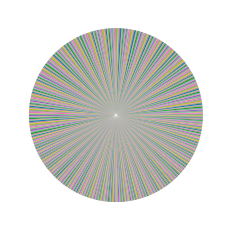

In [20]:
# pie() does not accept 2D array so we have to convert `new_ds` to 1D
plt.pie(new_ds.reshape(-1)) 
plt.show()

# 5 - Get Labels 0  and 1 

In [21]:
last = dataset[:, -1]
condition = (last == 0) | (last == 1)
labeled = np.array(dataset[condition])
labeled

array([[ 90.        ,  42.        ,  43.        , ...,   6.50298529,
        202.9355362 ,   0.        ],
       [ 85.        ,  58.        ,  41.        , ...,   7.03809636,
        226.6555374 ,   0.        ],
       [ 60.        ,  55.        ,  44.        , ...,   7.84020714,
        263.9642476 ,   0.        ],
       ...,
       [ 60.        ,  54.        ,  19.        , ...,   6.41782049,
         70.23401597,   1.        ],
       [ 83.        ,  58.        ,  23.        , ...,   6.38120191,
         65.50861389,   1.        ],
       [ 83.        ,  57.        ,  19.        , ...,   6.877869  ,
         98.73771338,   1.        ]])

# 6 - Write a function that return the Sigmoid of a number
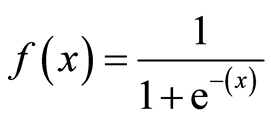

In [22]:
def calculate_sigmoid(x):
  return 1/(1 + np.exp(-x))

# 7 - Create simple linear model to classify the crop type if it's 0 or 1 


*   the linear model formula is " Y = X @ M + B  "
*   B = weight_and_bias['bias']
*   M = weight_and_bias['weight']
*   X = all the columns except the last column of the numpy array you obtained in point 5
*   Use the varable " weight_and_bias " that is already provided for you
*   Use the sigmoid function you wrote earlier on the out put of the output linear model




In [23]:
B = weight_and_bias['bias']
B

array([34.71255757])

In [24]:
M = weight_and_bias['weight']
M

array([-0.00836481,  0.01150059, -0.04896546, -0.00255238, -0.04095121,
        0.00037165, -0.20383096])

In [25]:
X = labeled[:,:-1]
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [ 60.        ,  54.        ,  19.        , ...,  62.49878458,
          6.41782049,  70.23401597],
       [ 83.        ,  58.        ,  23.        , ...,  59.66263104,
          6.38120191,  65.50861389],
       [ 83.        ,  57.        ,  19.        , ...,  70.74739256,
          6.877869  ,  98.73771338]])

In [26]:
Y = X @ M + B
Y = np.array([calculate_sigmoid(i) for i in Y])
# Y.round(2)
Y

array([3.97175806e-06, 4.66518347e-08, 2.19489581e-11, 1.50669415e-09,
       2.39821251e-11, 2.42807013e-10, 6.01236797e-12, 1.70636943e-09,
       2.00587471e-08, 1.68485222e-07, 1.81149753e-11, 2.97258534e-10,
       3.15941104e-13, 2.32037757e-04, 1.51977146e-06, 2.27828647e-08,
       1.25614130e-12, 2.37728397e-06, 7.80357657e-08, 6.04868541e-14,
       2.17120207e-04, 1.24939629e-08, 8.02710191e-07, 8.63498434e-09,
       7.27499542e-08, 1.04526218e-10, 3.62291354e-12, 4.01051400e-11,
       2.44987869e-09, 1.98205083e-05, 3.92213134e-12, 7.95900795e-06,
       5.44020645e-08, 5.78457717e-12, 8.56965335e-09, 3.21024698e-05,
       4.77628905e-12, 2.53599204e-13, 1.67444863e-14, 8.43572993e-11,
       6.21556599e-10, 1.14639549e-06, 1.19398341e-05, 1.45751234e-14,
       1.17667200e-11, 2.47157473e-04, 1.53676406e-05, 1.08290624e-08,
       1.13181858e-06, 1.43663443e-10, 1.42544288e-07, 2.26702409e-06,
       2.32392590e-05, 4.14721382e-08, 2.20212343e-13, 3.13218828e-13,
      

# 8 - Plot a pie plot of the result

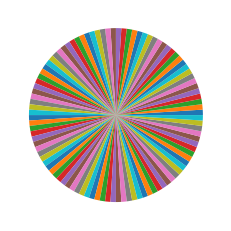

In [27]:
plt.pie(Y)
plt.show()